# <center> Pacmann Data Wrangling & SQL Project : Olist e-commerce

## <center> Balqis Dwian Fitri Zamzami - ADS Batch 13

### Import Libraryˎˊ˗ ✰

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import dataframe_image as dfi
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.gridspec import GridSpec

### Create Connection Database & View Tableˎˊ˗ ✰

In [2]:
conn = sqlite3.connect("olist.db") 

table_olist = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
table_olist

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


### Objectiveˎˊ˗ ✰



1. Top 10 Highest Selling Products 2016-2018
2. Top 10 Lowest Selling Products 2016-2018
3. Peak Time Online Transaction of Top 10 Sold Products Happen in 2018
4. Highest Payment Type Use In Olist 2016-2018
5. Payment Types On Top 10 Sold Product 2016-2018
6. Top 10 Customer City & Top 10 Customer State

### Exploration & Processingˎˊ˗ ✰

**Data Wrangling**
    
    - Joining or Combining relevant Data

In [3]:
# change database table into dataframe :

df_customers = pd.read_sql_query("SELECT * FROM olist_order_customer_dataset", conn)
df_status = pd.read_sql_query("SELECT * FROM olist_order_dataset", conn)
df_payments = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", conn)
df_orders = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", conn)
df_products = pd.read_sql_query("SELECT * FROM olist_products_dataset", conn)
df_products1 = pd.read_sql_query("SELECT * FROM product_category_name_translation", conn)

In [4]:
# join data

df = pd.merge(df_customers, df_status, how = 'left', on = 'customer_id')
df = pd.merge(df, df_payments, how = 'left', on = 'order_id')
df = pd.merge(df, df_orders, how = 'left', on = 'order_id' )
df_prod = pd.merge(df_products, df_products1, how = 'inner', on = 'product_category_name')
df = pd.merge(df, df_prod, how = 'left', on = 'product_id')

df

,index_x_x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index_y_x,order_id,order_status,order_purchase_timestamp,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y_y,product_category_name_english
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,30.0,office_furniture
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,...,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,7.0,housewares
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,...,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,30.0,office_furniture
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,...,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,30.0,office_furniture
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,...,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1822,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,...,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0,48.0,books_general_interest
118430,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,16146,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,...,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,5.0,sports_leisure
118431,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,70778,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,...,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0,0.0,health_beauty
118432,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,30836,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,...,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0,9.0,watches_gifts


In [5]:
print (" Number of columns after joining data or merge : ", df.shape)

 Number of columns after joining data or merge :  (118434, 37)


In [6]:
# drop unused columns

df = df.drop(['index_x_x', 'customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'index_y_x',
              'order_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
              'order_estimated_delivery_date', 'index_x_x', 'payment_sequential', 'payment_installments', 'payment_value', 
              'index_y_x', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'index_x_y',
              'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_category_name', 'product_length_cm',
              'product_height_cm', 'product_width_cm', 'index_y_y'], axis = 1)

# change column name
df = df.rename(columns = {'product_category_name_english': 'product'})

print (" Number of final columns : ", df.shape)

 Number of final columns :  (118434, 6)


In [7]:
df

,customer_city,customer_state,order_status,order_purchase_timestamp,payment_type,product
0,franca,SP,delivered,2017-05-16 15:05:35,credit_card,office_furniture
1,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,credit_card,housewares
2,sao paulo,SP,delivered,2018-05-19 16:07:45,credit_card,office_furniture
3,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,credit_card,office_furniture
4,campinas,SP,delivered,2018-07-29 09:51:30,credit_card,home_confort
...,...,...,...,...,...,...
118429,sao paulo,SP,delivered,2018-04-07 15:48:17,credit_card,books_general_interest
118430,taboao da serra,SP,delivered,2018-04-04 08:20:22,credit_card,sports_leisure
118431,fortaleza,CE,delivered,2018-04-08 20:11:50,credit_card,health_beauty
118432,canoas,RS,delivered,2017-11-03 21:08:33,credit_card,watches_gifts


**Data Cleaning**

In [8]:
# cleaning Null
df.isna().sum()

# columns contain nan
columns_with_nan = ['payment_type', 'product']

# data type of each column
df[columns_with_nan].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   payment_type  118431 non-null  object
 1   product       115881 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [9]:
# Handling Missing Data

## impute payment_type with mode
df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])

## impute product with mode
df['product'] = df['product'].fillna(df['product'].mode()[0])

## count the number of missing values in each column after imputation
df.isna().sum()

customer_city               0
customer_state              0
order_status                0
order_purchase_timestamp    0
payment_type                0
product                     0
dtype: int64

In [10]:
# Handling Duplicate Data
df.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

print (" The amount of data becomes : ", df.shape)

 The amount of data becomes :  (102323, 6)


**Data Manipulation**

*Parsing Dates*

1 day = 24 hours, divided into 4 time categories :
- morning = 05.00 - 11.00
- afternoon = 12.00 - 17.00
- evening = 18.00 - 22.00
- night = 23.00 - 04.00


consider 1 month = 31 days, divided into 4 week categories :
- week 1 = 1st - 7th
- week 2 = 8th - 14th
- week 3 = 15th - 21st
- week 4 = 22nd - 31st


In [11]:
# Parsing Dates

## categorize time in 1 day
def time_of_day(hour):
    return (
        "Morning" if 5 <= hour <= 11
        else
        "Afternoon" if 12 <= hour <= 17
        else
        "Evening" if 18 <= hour <= 22
        else
        "Night")

## categorize weeks in 1 month
def week_of_month(day):
    return (
        "Week 1" if 1 <= day <= 7
        else
        "Week 2" if 8 <= day <= 14
        else
        "Week 3" if 15 <= day <= 21
        else
        "Week 4")

In [12]:
# convert order_purchase_timestamp to datetime
purchase_time = pd.to_datetime(df['order_purchase_timestamp'])

df['purchase_date'] = purchase_time.dt.to_period('M').astype('str')
df['purchase_year'] = purchase_time.dt.year 
df['purchase_month'] = purchase_time.dt.month_name() 
df['purchase_month_number'] = purchase_time.dt.month 
df['purchase_day'] = purchase_time.dt.day_name() 
df['purchase_day_number'] = purchase_time.dt.day 
df['purchase_hour'] = purchase_time.dt.hour 
df['purchase_timeofday'] = df['purchase_hour'].apply(time_of_day) 
df['purchase_weekofmonth'] = df['purchase_day_number'].apply(week_of_month) 

df['purchase_date'] = df['purchase_date'].str.replace('-','')
df

,customer_city,customer_state,order_status,order_purchase_timestamp,payment_type,product,purchase_date,purchase_year,purchase_month,purchase_month_number,purchase_day,purchase_day_number,purchase_hour,purchase_timeofday,purchase_weekofmonth
0,franca,SP,delivered,2017-05-16 15:05:35,credit_card,office_furniture,201705,2017,May,5,Tuesday,16,15,Afternoon,Week 3
1,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,credit_card,housewares,201801,2018,January,1,Friday,12,20,Evening,Week 2
2,sao paulo,SP,delivered,2018-05-19 16:07:45,credit_card,office_furniture,201805,2018,May,5,Saturday,19,16,Afternoon,Week 3
3,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,credit_card,office_furniture,201803,2018,March,3,Tuesday,13,16,Afternoon,Week 2
4,campinas,SP,delivered,2018-07-29 09:51:30,credit_card,home_confort,201807,2018,July,7,Sunday,29,9,Morning,Week 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102318,sao paulo,SP,delivered,2018-04-07 15:48:17,credit_card,books_general_interest,201804,2018,April,4,Saturday,7,15,Afternoon,Week 1
102319,taboao da serra,SP,delivered,2018-04-04 08:20:22,credit_card,sports_leisure,201804,2018,April,4,Wednesday,4,8,Morning,Week 1
102320,fortaleza,CE,delivered,2018-04-08 20:11:50,credit_card,health_beauty,201804,2018,April,4,Sunday,8,20,Evening,Week 2
102321,canoas,RS,delivered,2017-11-03 21:08:33,credit_card,watches_gifts,201711,2017,November,11,Friday,3,21,Evening,Week 1


**Analysis**

### Top 10 Highest Selling Products 2016-2018ˎˊ˗ ✰

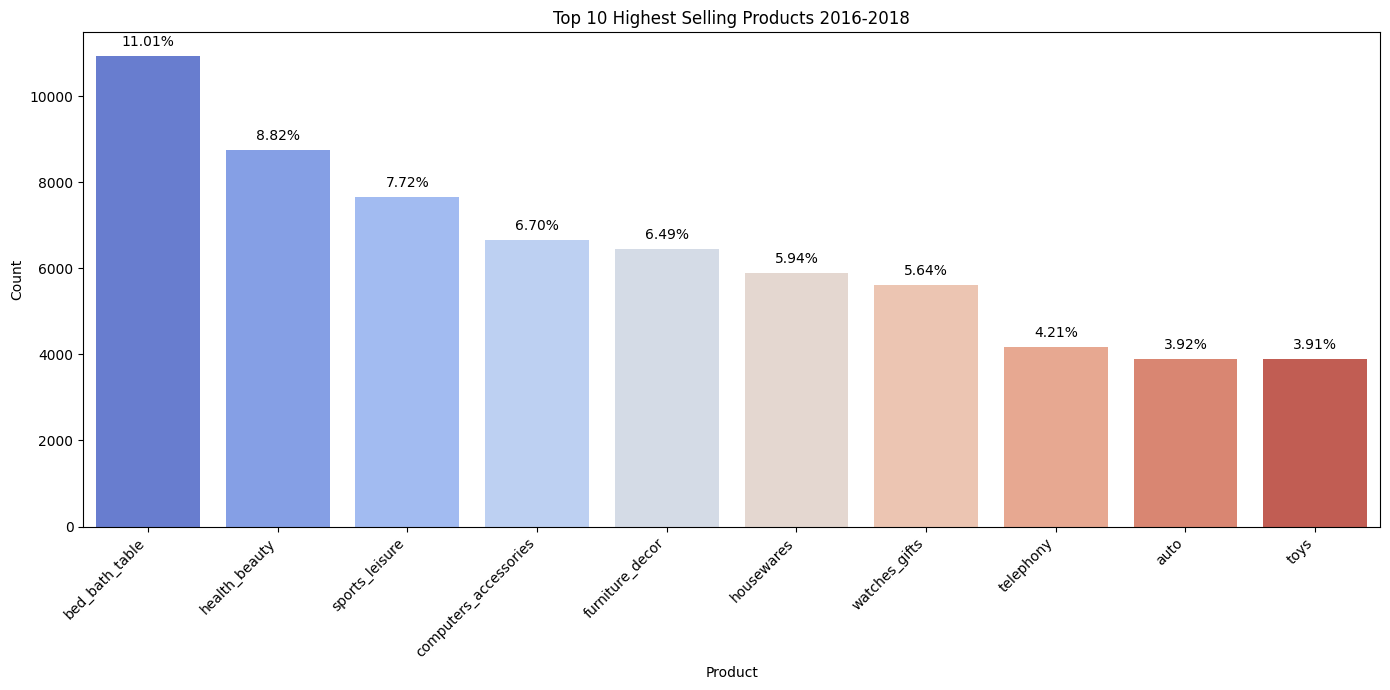

In [13]:
cond = df[df['order_status'] == 'delivered']

fig = plt.figure(figsize=(14, 7))
ax = sns.countplot(x=cond["product"], palette="coolwarm",
                   order=cond["product"].value_counts().iloc[:10].index)
total = len(cond["product"])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points")
ax.set_title("Top 10 Highest Selling Products 2016-2018")
ax.set_xlabel("Product")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  

plt.tight_layout()
plt.savefig("Top 10 Highest Selling Products 2016-2018.png")
plt.show()

From the output above inform the 10 types of products most often ordered in Olist period 2016-2018. The top 10 highest-selling product categories from 2016-2018 are Health Bed Bath Table, Health Beauty, Sports Leisure, Computer Accessories, Furniture Decor, Housewares, Watches Gifts, Telephony, Auto, and Toys. 

### Top 10 Lowest Selling Products 2016-2018ˎˊ˗ ✰

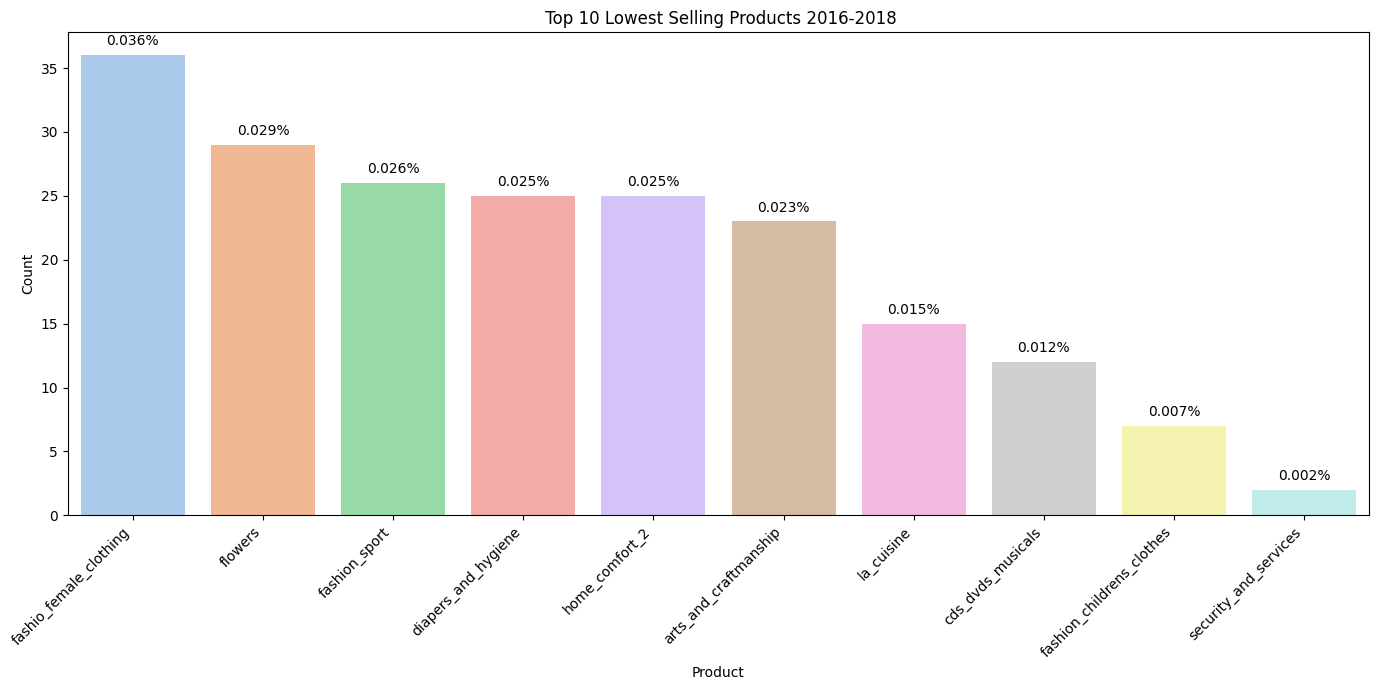

In [14]:
fig = plt.figure(figsize=(14, 7))
ax = sns.countplot(x=cond["product"], palette="pastel",
                   order = cond["product"].value_counts().tail(10).index)
total = len(cond["product"])
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points")
ax.set_title(" Top 10 Lowest Selling Products 2016-2018")
ax.set_xlabel("Product")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("Top 10 Lowest Selling Products 2016-2018.png")
plt.show()

From the output above inform the 10 lowest selling products in Olist period 2016-2018. The top 10 lowest-selling product categories from 2016 to 2018 are fashio_female_clothin, flowers, fashion_sport, diapers_and_hygiene, home_comfort_2, arts_ and_craftmanship, la_cuisine, cds_dvds_musicals, fashion _childrens_cloths, and security_and _services.

### Peak Time Online Transaction of Top 10 Sold Products Happen in 2018ˎˊ˗ ✰

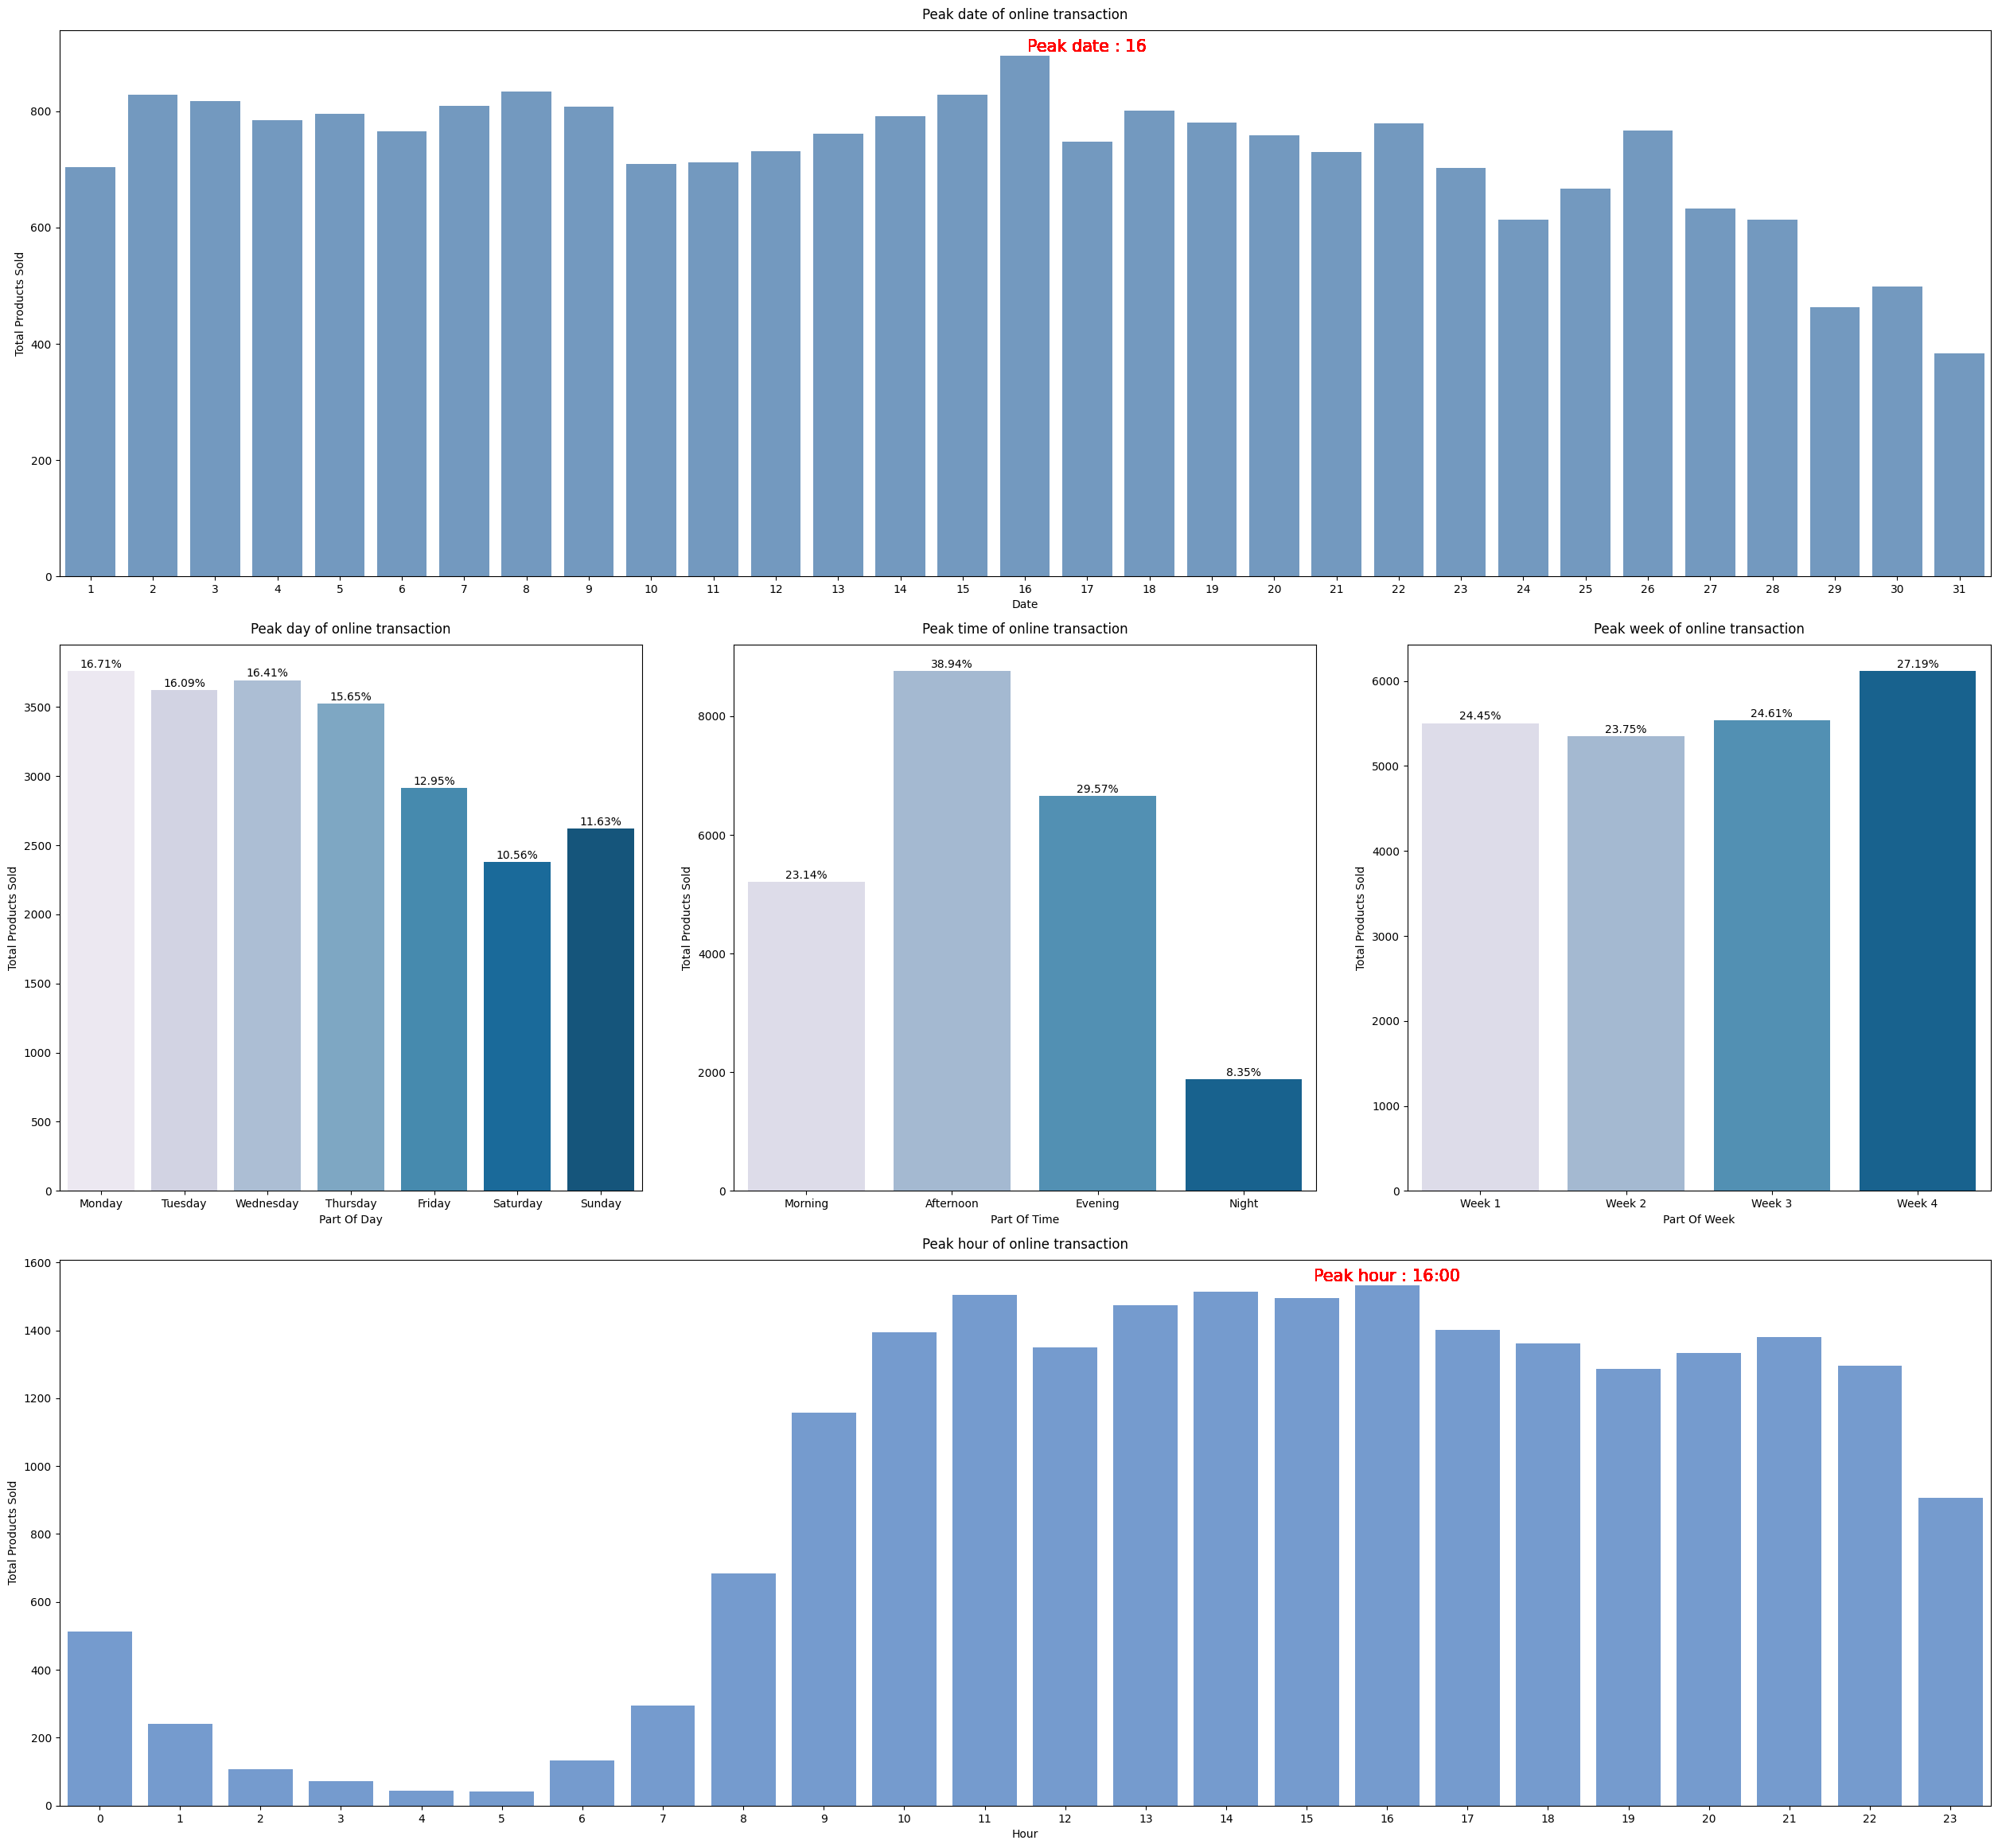

In [15]:
year_2018 = df[df["purchase_year"] == 2018]
cond = year_2018[(year_2018["order_status"] == "delivered") & ((year_2018["product"] == "bed_bath_table") | (year_2018["product"] == "health_beauty") 
                                                  | (year_2018["product"] == "sports_leisure") | (year_2018["product"] =="computers_accessories") 
                                                  | (year_2018["product"] =="watches_gifts"))]
fig = plt.figure(constrained_layout=True, figsize=(25, 30))

gs = GridSpec(4, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, :])

# Peak date 
sns.countplot(x=cond["purchase_day_number"],color="#69c", ax= ax1)
for p in ax1.patches:
    ax1.annotate("Peak date : 16", xy = (16, 895), xytext= (0, 8), 
    ha = "center",  va="center", color="red", size=15, textcoords = "offset points")
ax1.set_title("Peak date of online transaction", size=12, pad=10)
ax1.set_xlabel("Date")
ax1.set_ylabel("Total Products Sold")

# Peak day
day_label = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x=cond["purchase_day"], ax=ax2,palette="PuBu", order=day_label)
total = len(cond["purchase_day"])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center", xytext = (0, 6), textcoords = "offset points")
ax2.set_title("Peak day of online transaction", size=12, pad=10)
ax2.set_xlabel("Part Of Day")
ax2.set_ylabel("Total Products Sold")

# Peak time of day
time_label = ["Morning", "Afternoon", "Evening", "Night"]
sns.countplot(x=cond["purchase_timeofday"], ax=ax3,palette="PuBu", order=time_label)
total = len(cond["purchase_timeofday"])
for p in ax3.patches:
    ax3.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center", xytext = (0, 6), textcoords = "offset points")
ax3.set_title("Peak time of online transaction", size=12, pad=10)
ax3.set_xlabel("Part Of Time")
ax3.set_ylabel("Total Products Sold")

# Peak week of month
week_label = ["Week 1", "Week 2", "Week 3", "Week 4"]
sns.countplot(x=cond["purchase_weekofmonth"],ax=ax4, palette="PuBu", order=week_label)
total = len(cond["purchase_weekofmonth"])
for p in ax4.patches:
    ax4.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center", xytext = (0, 6), textcoords = "offset points")
ax4.set_title("Peak week of online transaction", size=12, pad=10)
ax4.set_xlabel("Part Of Week")
ax4.set_ylabel("Total Products Sold")

# Peak hour
sns.countplot(x=cond["purchase_hour"],color="#69d", ax= ax5)
for p in ax5.patches:
    ax5.annotate("Peak hour : 16:00", xy = (16, 1532), xytext= (0, 8),
                 ha = "center",  va="center", color="red", size=15, textcoords = "offset points")
ax5.set_title("Peak hour of online transaction", size=12, pad=10)
ax5.set_xlabel("Hour")
ax5.set_ylabel("Total Products Sold")

plt.savefig("Peak Time 2018.png")

Based on the output above the top of the products sold there is on the 16th Monday afternoon of the 4th Sunday at 16:00.

### Highest Payment Type Use In Olist 2016-2018ˎˊ˗ ✰

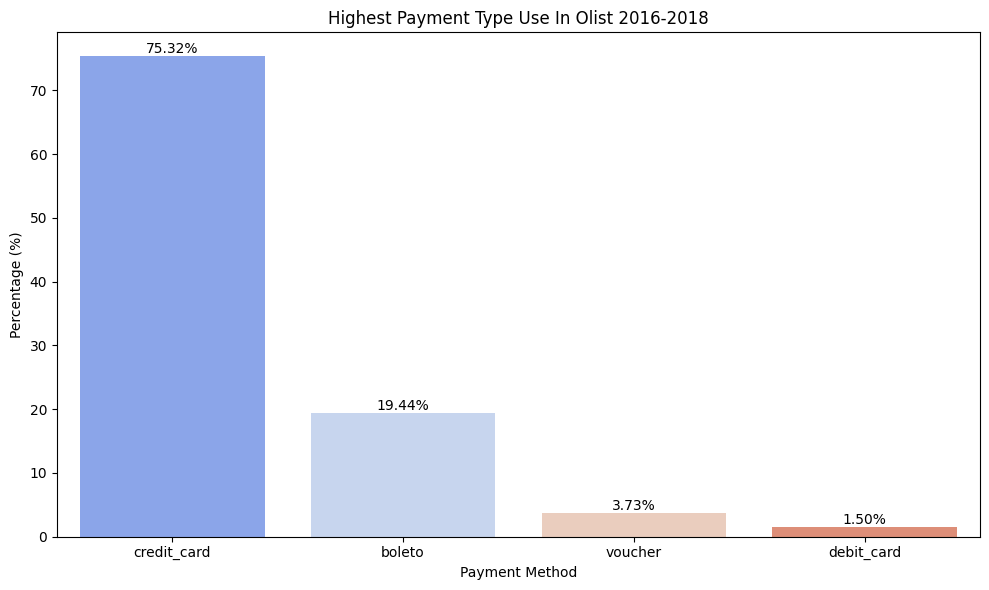

In [16]:
payments = df[df["order_status"] == "delivered"]

total_orders = len(payments)

payment_counts = payments["payment_type"].value_counts()
payment_percentages = payment_counts / total_orders * 100

fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=payment_percentages.index, y=payment_percentages.values, palette="coolwarm")
ax.set_title("Highest Payment Type Use In Olist 2016-2018")
ax.set_xlabel("Payment Method")
ax.set_ylabel("Percentage (%)")

for i, v in enumerate(payment_percentages.values):
    ax.text(i, v, f"{v:.2f}%", ha="center", va="bottom")

plt.tight_layout()
plt.savefig("Highest Payment Type Use In Olist 2016-2018.png")
plt.show()

Based on the output above, the payment method in 2016-2018 used credit cards amounted to `75.32%` of the total transaction in Olist.

### Payment Types On Top 10 Sold Product 2016-2018ˎˊ˗ ✰

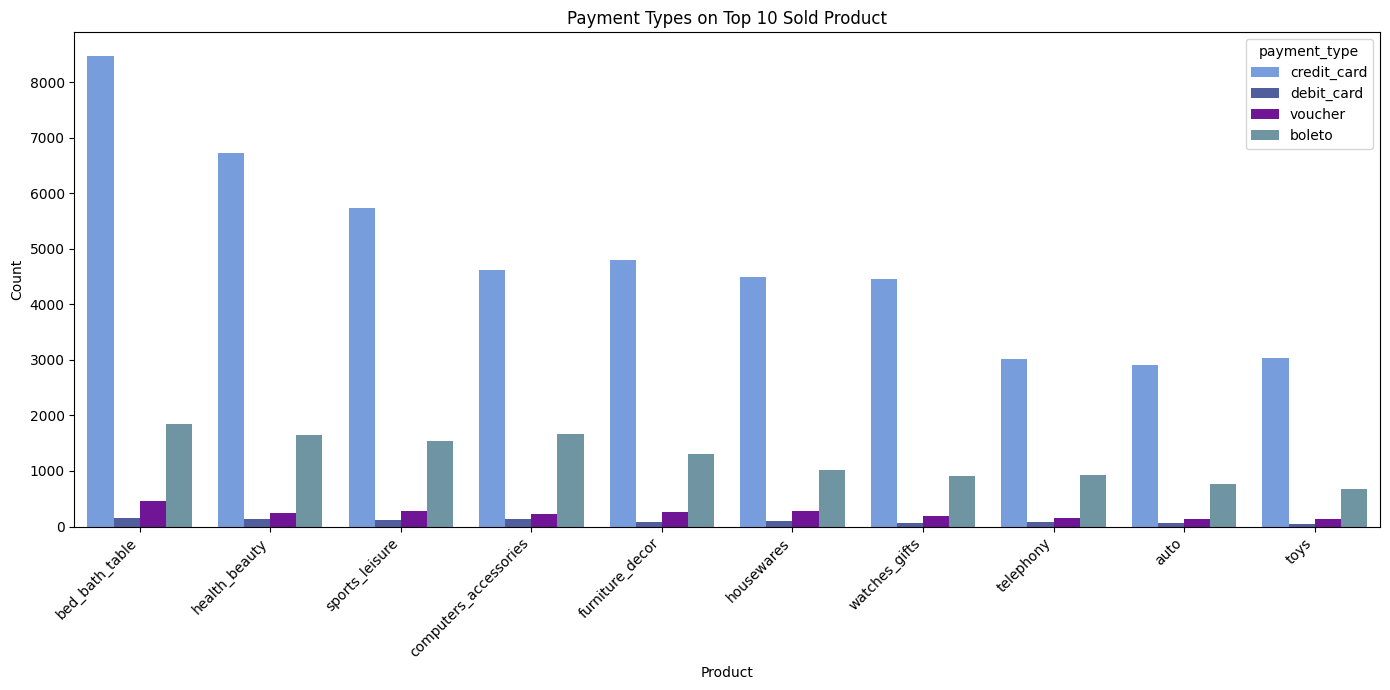

In [17]:
fig = plt.figure(figsize=(14, 7))
cond = df[(df["order_status"] == "delivered")]

palette ={"credit_card": "#69e", "boleto": "#69a", "voucher": "#70a", "debit_card": "#45a"}
ax= sns.countplot(x=cond["product"], palette= palette, hue=cond["payment_type"], 
                   order = cond["product"].value_counts().iloc[:10].index)
ax.set_title("Payment Types on Top 10 Sold Product")
ax.set_xlabel("Product")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("Payment Types on Top 10 Sold Product.png")
plt.show()

Based on the output above seen on each product sold a lot using the payment method `credit_card`.

### Top 10 Customer City & Top 10 Customer Stateˎˊ˗ ✰

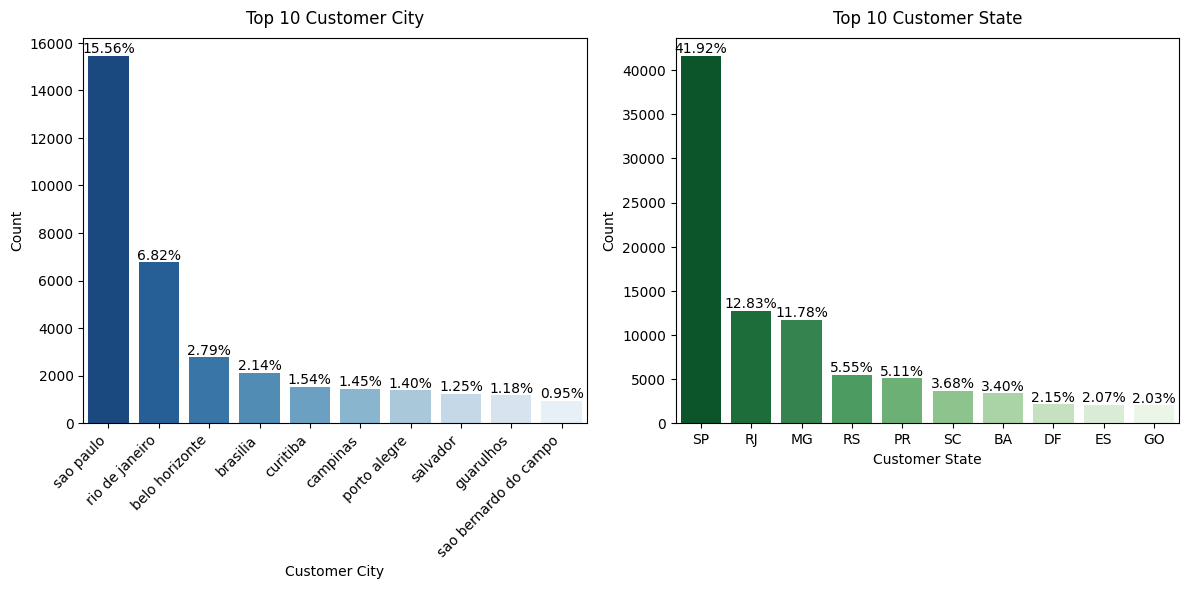

In [27]:
cond = df[(df["order_status"] == "delivered")]

fig = plt.figure(constrained_layout=True, figsize=(12, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Top 10 customer city
sns.countplot(x=cond["customer_city"], palette="Blues_r",
              order=cond.customer_city.value_counts().iloc[:10].index, ax = ax1)
total = len(cond["customer_city"])
for p in ax1.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_y() + p.get_height() 
    ax1.annotate(percentage, (x,y),
    ha = "center", va = "center", xytext = (0, 5), textcoords = "offset points")
ax1.set_title("Top 10 Customer City", size=12, pad=10)
ax1.set_xlabel("Customer City")
ax1.set_ylabel("Count")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Top 10 customer state
sns.countplot(x=cond["customer_state"], palette="Greens_r",
              order=cond.customer_state.value_counts().iloc[:10].index, ax = ax2)
total = len(cond["customer_state"])
for p in ax2.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_y() + p.get_height() 
    ax2.annotate(percentage, (x,y),
    ha = "center", va = "center", xytext = (0, 5), textcoords = "offset points")
ax2.set_title("Top 10 Customer State", size=12, pad=10)
ax2.set_xlabel("Customer State")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.savefig("Top 10 customer city and customer state.png")
plt.show()

Based on the output above, we can see the top 10 of Customer City & Customer State. The first position of both being `SP (sao paulo)`.